## 텍스트 마이닝
* 텍스트로부터 정보를 추출

In [49]:
DATA_PATH = '../../data/text mining/Amazon_Unlocked_Mobile.csv'

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(DATA_PATH)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [52]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

## 시각화

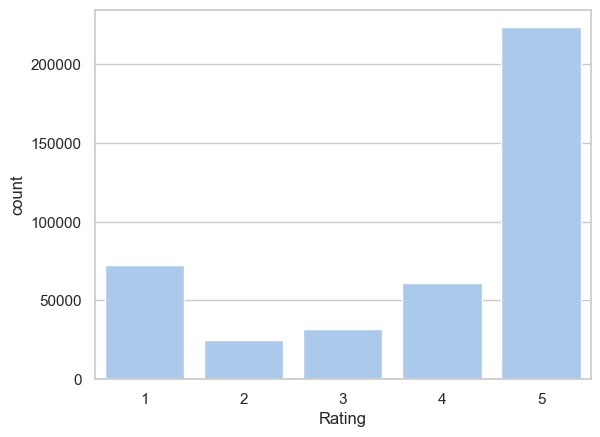

In [53]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.countplot(data=df, x='Rating')
plt.show()

In [54]:
# 리뷰의 글자 수 확인
df['Reviews'].dropna().map(len)

0         374
1         214
2          12
3          76
4         223
         ... 
413835     30
413836      2
413837     43
413838     92
413839     83
Name: Reviews, Length: 413770, dtype: int64

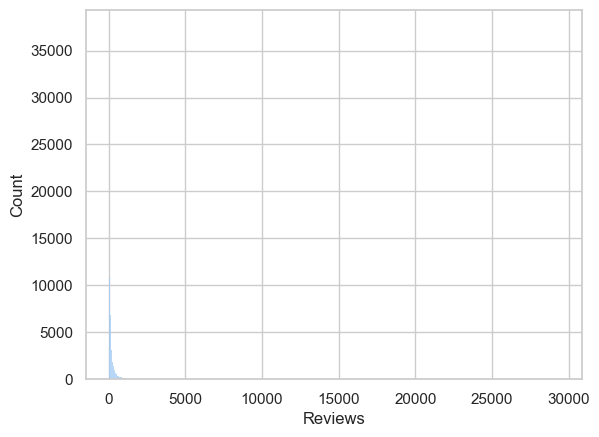

In [55]:
# 리뷰의 길이 분포 (글자 수)
sns.histplot(df['Reviews'].dropna().map(len))
plt.show()

In [56]:
# 리뷰가 1000 자 이내인 일반적인 상황만 고려 (outlier 제거)
# 가장 긴 리뷰 글자 수 확인
df['Reviews'].dropna().map(len).max()

29419

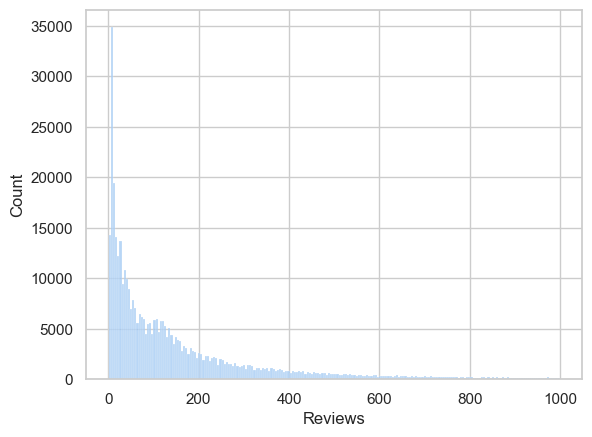

In [57]:
# 1000자 이내 리뷰 시각화
reviews_chars = df['Reviews'].dropna().map(len)
reviews_chars_under_1000_mask = reviews_chars < 1000

sns.histplot(reviews_chars[reviews_chars_under_1000_mask])
plt.show()

In [58]:
# 리뷰 단어의 갯수
df['Reviews'].dropna().map(lambda x : len(x.split()))

0         72
1         40
2          2
3         17
4         43
          ..
413835     5
413836     1
413837     7
413838    19
413839    13
Name: Reviews, Length: 413770, dtype: int64

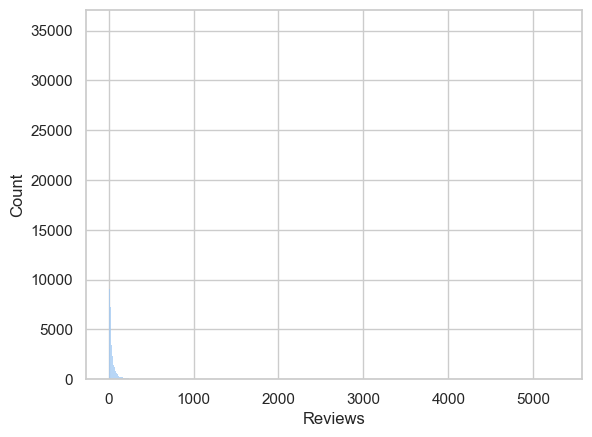

In [59]:
sns.histplot(df['Reviews'].dropna().map(lambda x : len(x.split())))
plt.show()

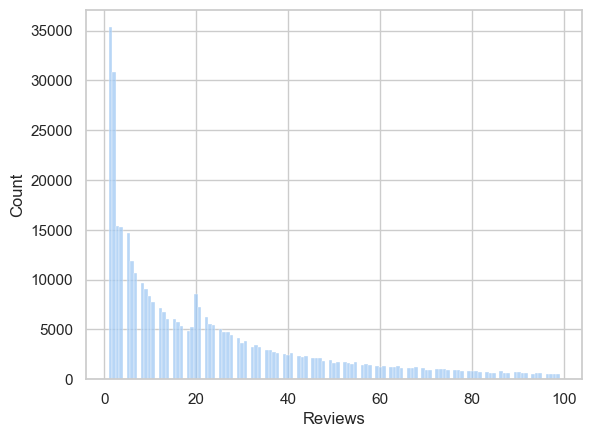

In [60]:
reviews_words = df['Reviews'].dropna().map(lambda x : len(x.split()))
reviews_words_under_100_mask = reviews_words < 100

sns.histplot(reviews_words[reviews_words_under_100_mask])
plt.show()

In [61]:
# 리뷰의 길이와 투표 수의 상관관계
df['Review Words'] = df['Reviews'].dropna().map(lambda x : len(x.split()))

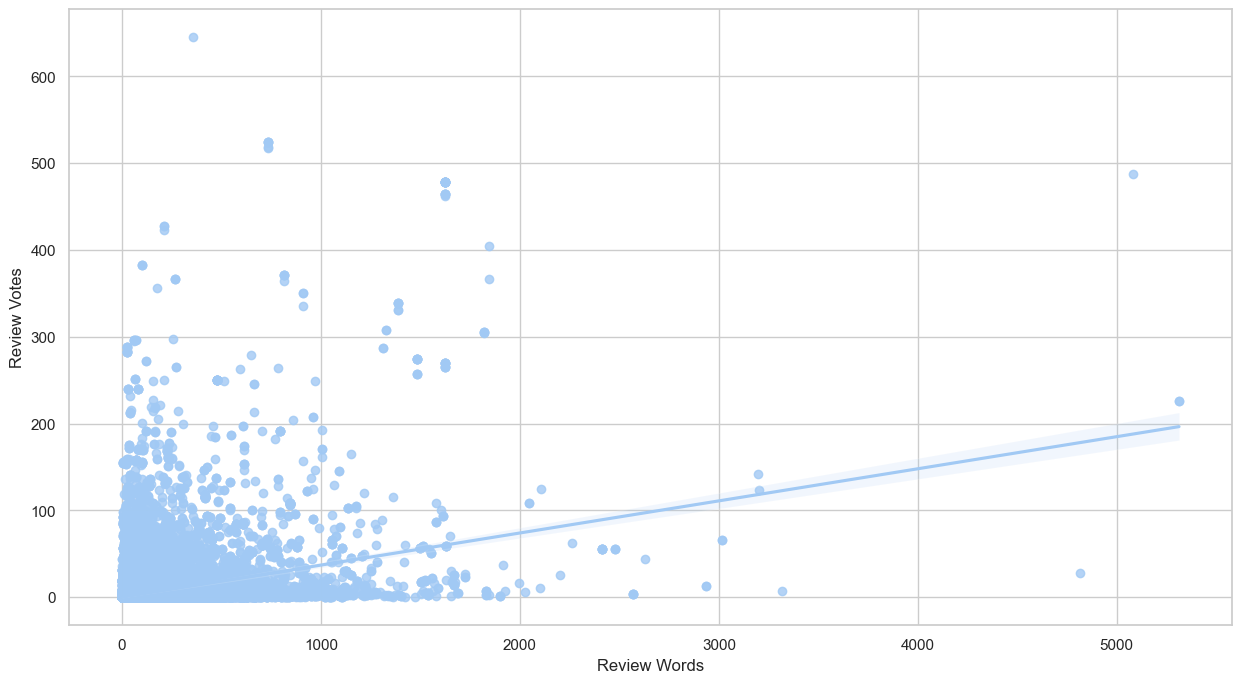

In [62]:
plt.figure(figsize=(15,8))

sns.regplot(x='Review Words', y='Review Votes', data=df) # 분포와 상관관계 표시
plt.show()

In [63]:
# 애플과 삼성의 평균 평점
df.loc[df['Brand Name'] == 'Samsung']['Rating'].mean()

3.9623556968378786

In [64]:
df.loc[df['Brand Name'] == 'Apple']['Rating'].mean()

3.9244148076856975

텍스트 마이닝을 통해 삼성과 애플 핸드폰의 긍정/부정적 리뷰에 대한 키워드 분석

In [65]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords') # 불용어 (텍스트 분석에 도움이 되지 않는 단어들) 사전 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [67]:
from nltk import word_tokenize

sample_review = df.loc[0, 'Reviews']
print (sample_review)

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


In [68]:
# 영어는 일반적으로 불용어 제거 전 전부 소문자로 만들어 준 다음 전처리 수행
sample_review_lower = sample_review.lower()
print(word_tokenize(sample_review_lower))

['i', 'feel', 'so', 'lucky', 'to', 'have', 'found', 'this', 'used', '(', 'phone', 'to', 'us', '&', 'not', 'used', 'hard', 'at', 'all', ')', ',', 'phone', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'this', 'one', '.', 'my', 'son', 'liked', 'his', 'old', 'one', 'that', 'finally', 'fell', 'apart', 'after', '2.5+', 'years', 'and', 'did', "n't", 'want', 'an', 'upgrade', '!', '!', 'thank', 'you', 'seller', ',', 'we', 'really', 'appreciate', 'it', '&', 'your', 'honesty', 're', ':', 'said', 'used', 'phone.i', 'recommend', 'this', 'seller', 'very', 'highly', '&', 'would', 'but', 'from', 'them', 'again', '!', '!']


In [69]:
sample_review_words_tokens = word_tokenize(sample_review_lower)
sample_review_words_without_stopwords = [token for token in sample_review_words_tokens if token not in stopwords.words('english')]
sample_review_words_without_stopwords

['feel',
 'lucky',
 'found',
 'used',
 '(',
 'phone',
 'us',
 '&',
 'used',
 'hard',
 ')',
 ',',
 'phone',
 'line',
 'someone',
 'upgraded',
 'sold',
 'one',
 '.',
 'son',
 'liked',
 'old',
 'one',
 'finally',
 'fell',
 'apart',
 '2.5+',
 'years',
 "n't",
 'want',
 'upgrade',
 '!',
 '!',
 'thank',
 'seller',
 ',',
 'really',
 'appreciate',
 '&',
 'honesty',
 ':',
 'said',
 'used',
 'phone.i',
 'recommend',
 'seller',
 'highly',
 '&',
 'would',
 '!',
 '!']

## 아마존 스마트폰 리뷰 word cloud 그리기

In [70]:
# 데이터셋 크기 줄이기 위해 1%만 랜덤 선택
df_sample = df.dropna().sample(frac=0.01)
df_sample.shape

(3343, 7)

In [ ]:
# word cloud 는 문장 내 단어 빈도가 중요 => 모든 리뷰를 한 줄로 이어준다
all_reviews = ' '.join(df_sample['Reviews'])
all_reviews

In [ ]:
all_reviews_lower = all_reviews.lower()
all_reviews_lower

In [73]:
# tokenize
all_reviews_tokens = word_tokenize(all_reviews_lower)
all_reviews_tokens[:10]

['nokia',
 'needs',
 'to',
 'add',
 'some',
 'assembly',
 'required',
 '.',
 'the',
 'sim']

In [74]:
# stopword 제거
all_reviews_tokens_clean = [token for token in all_reviews_tokens if token not in stopwords.words('english')]
all_reviews_tokens_clean[:10]

['nokia',
 'needs',
 'add',
 'assembly',
 'required',
 '.',
 'sim',
 'card',
 'slot',
 'comes']

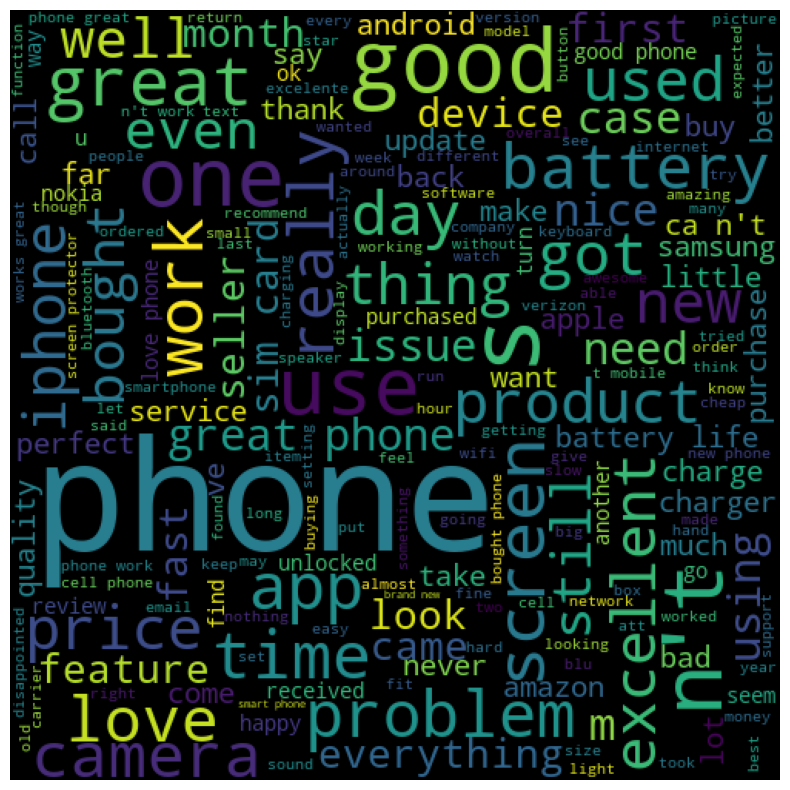

In [76]:
from wordcloud import WordCloud

wc = WordCloud(max_font_size=100, width=500, height=500)

# 문장 기반으로 단어들의 wordcloud 그리기
all_review_wc = wc.generate(' '.join(all_reviews_tokens_clean))

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(all_review_wc)
plt.show()

In [77]:
# 워드 클라우드를 여러번 그리면서 전처리 과정을 간소화 하기 위해 함수로 만들어 놓기
def clean_reviews(df):

  # 데이터 프레임의 리뷰를 하나의 문자열로 이어주기
  reviews = ' '.join(df['Reviews'])

  # 소문자화 수행
  reviews_lower = reviews.lower()

  # 토큰화
  reviews_tokens = word_tokenize(reviews_lower)

  # 불용어 제거
  reviews_tokens_clean = [ token for token in reviews_tokens if token not in stopwords.words("english") ]

  return reviews_tokens_clean

def draw_wordcloud(df):
  global wc

  # 전처리가 완료된 토큰 얻어내기
  reviews_tokens_clean = clean_reviews(df)

  # 워드클라우드 그리기(이미지 받기)
  reviews_wc = wc.generate(' '.join(reviews_tokens_clean))

  return reviews_wc

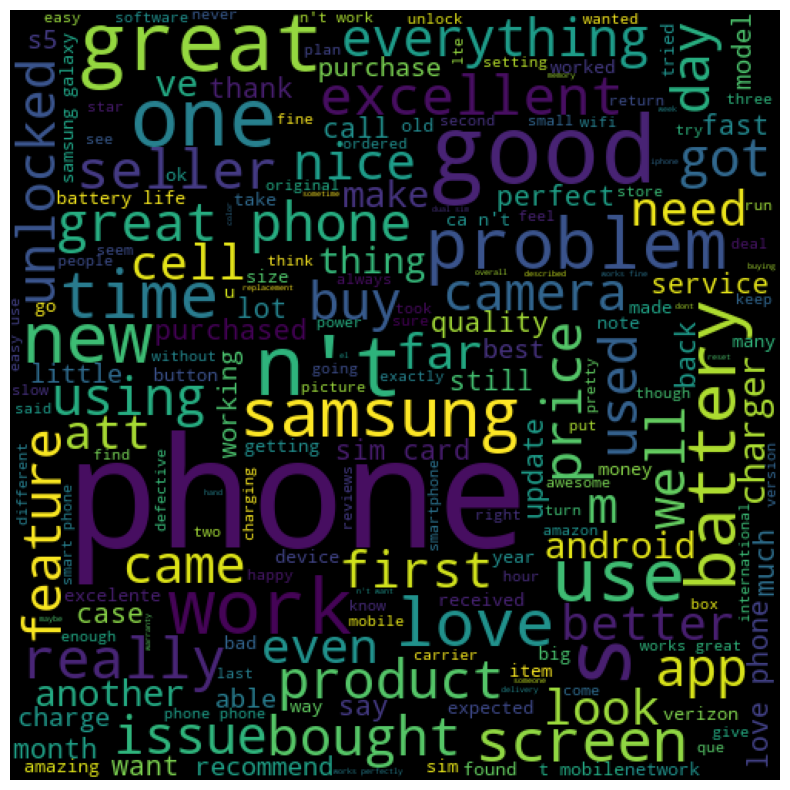

In [78]:
# 삼성 폰에 대해서만 워드클라우드 그리기
df_samsung = df_sample.loc[df_sample['Brand Name'] == 'Samsung']

samsung_review_wc = draw_wordcloud(df_samsung)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(all_review_wc)
plt.show()

## Spacy 사용하기

In [82]:
import spacy

# 단어 사전 다운로드
nlp = spacy.load("en_core_web_sm")

In [83]:
test_sentence = """I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."""

In [84]:
doc = nlp(test_sentence)
doc.text

"I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."

In [86]:
# spacy에 통과시킨 doc로 부터 각 단어의 정보를 확인할 수 있다.
#lemma = 단어의 원형
for word_token in doc:
  print("word : {}\t\tPOS : {}\t\tLemma : {}".format(word_token.text, word_token.pos_, word_token.lemma_))

word : I		POS : PRON		Lemma : I
word : 'm		POS : AUX		Lemma : be
word : at		POS : ADP		Lemma : at
word : a		POS : DET		Lemma : a
word : payphone		POS : NOUN		Lemma : payphone
word : ,		POS : PUNCT		Lemma : ,
word : trying		POS : VERB		Lemma : try
word : to		POS : PART		Lemma : to
word : call		POS : VERB		Lemma : call
word : home		POS : NOUN		Lemma : home
word : .		POS : PUNCT		Lemma : .
word : All		POS : PRON		Lemma : all
word : of		POS : ADP		Lemma : of
word : my		POS : PRON		Lemma : my
word : change		POS : NOUN		Lemma : change
word : I		POS : PRON		Lemma : I
word : spent		POS : VERB		Lemma : spend
word : on		POS : ADP		Lemma : on
word : you		POS : PRON		Lemma : you
word : .		POS : PUNCT		Lemma : .
word : Where		POS : SCONJ		Lemma : where
word : have		POS : AUX		Lemma : have
word : the		POS : DET		Lemma : the
word : times		POS : NOUN		Lemma : time
word : gone		POS : VERB		Lemma : go
word : ..		POS : PUNCT		Lemma : ..
word : Baby		POS : PROPN		Lemma : Baby
word : ,		POS : PUNCT		Lemma 

In [92]:
# 반복문에서 현재 진행 상황이 얼마나 되는지 표시
from tqdm import tqdm

under_100_words_mask = df_sample.dropna()['Review Words'] < 100
df_sample_under_100 = df_sample.loc[under_100_words_mask]
df_sample_under_100

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words
244229,Moto G Plus (4th Gen.) Unlocked - Black - 64GB...,Motorola,299.00,4,Really nice cellphone works worldwide,0.0,5.0
360086,Samsung Galaxy S6 32GB SM-G920i - Unlocked Whi...,Samsung,459.99,4,Good phone. Wish battery life was better.,0.0,7.0
237901,"LG V10 H962 64GB White, Dual Sim, 5.7"", 16 MP,...",LG Electronics,425.72,1,It's not a completed unlocked phone. It only c...,0.0,22.0
273854,Nokia Lumia 920 32GB Unlocked GSM Windows 8 Sm...,Nokia,99.99,1,"The cell on the fourth day, the screen freezes...",0.0,30.0
47443,Apple iPhone 5s 64GB (Silver) - T-Mobile,Apple,265.00,5,Perfect perfect perfect! My phone came right o...,1.0,46.0
...,...,...,...,...,...,...,...
90552,"BlackBerry Classic Factory Unlocked Cellphone,...",BlackBerry,149.99,1,Very poor on navigation. Very slow phone,0.0,7.0
355285,Samsung Galaxy S5 SM-G900A 16GB 4G LTE GSM Unl...,Samsung,174.95,5,Enjoy,0.0,1.0
262084,"Nokia 7705 Twist Phone, Black (Verizon Wireles...",Nokia,87.99,4,We really like the phone even thoe the battey ...,1.0,58.0
121248,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,Its everything that I wanted in a phone for a ...,0.0,21.0


In [93]:
# 아까와 다르게 각 리뷰를 따로 처리해서 워드클라우드 생성
# 모든 리뷰 소문자로
df_sample_under_100['Reviews lower'] = df_sample['Reviews'].apply(lambda x : x.lower())
df_sample_under_100.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18056\729476281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Reviews lower'] = df_sample['Reviews'].apply(lambda x : x.lower())


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words,Reviews lower
244229,Moto G Plus (4th Gen.) Unlocked - Black - 64GB...,Motorola,299.00,4,Really nice cellphone works worldwide,0.0,5.0,really nice cellphone works worldwide
360086,Samsung Galaxy S6 32GB SM-G920i - Unlocked Whi...,Samsung,459.99,4,Good phone. Wish battery life was better.,0.0,7.0,good phone. wish battery life was better.
237901,"LG V10 H962 64GB White, Dual Sim, 5.7"", 16 MP,...",LG Electronics,425.72,1,It's not a completed unlocked phone. It only c...,0.0,22.0,it's not a completed unlocked phone. it only c...
273854,Nokia Lumia 920 32GB Unlocked GSM Windows 8 Sm...,Nokia,99.99,1,"The cell on the fourth day, the screen freezes...",0.0,30.0,"the cell on the fourth day, the screen freezes..."
47443,Apple iPhone 5s 64GB (Silver) - T-Mobile,Apple,265.00,5,Perfect perfect perfect! My phone came right o...,1.0,46.0,perfect perfect perfect! my phone came right o...


In [96]:
%%time

tokens_preprocessed = []

for doc in tqdm(nlp.pipe(df_sample_under_100["Reviews lower"])):
  # 각 단어의 lemma를 구한 토큰
  lemmatized_tokens = [ token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]
  tokens_preprocessed.append(lemmatized_tokens)

tokens_preprocessed[:3]

3044it [00:11, 270.29it/s]

CPU times: total: 11.2 s
Wall time: 11.3 s


[['nice', 'cellphone', 'work', 'worldwide'],
 ['good', 'phone', 'wish', 'battery', 'life', 'well'],
 ['complete',
  'unlocked',
  'phone',
  'come',
  'single',
  'page',
  'chinese',
  'manual',
  'suitable',
  'usa',
  'mobile',
  'carrier']]

# Bigram & Trigram (N-GRAM)
* 한번에 몇 개의 단어를 동시에 볼지 결정
* 같이 자주 등장하는 단어들을 묶는다
  * 연관성이 있다고 판단하기는 비약

In [99]:
# gensim 패키지는 자연어 처리 관련 여러 라이브러리 포함
from gensim.models.phrases import Phrases, Phraser

sentences = [
    '피카츄 라이츄 파이리 꼬부기',
    '피카츄 라이츄 의 진화 전 포켓몬 입니다',
    '피카츄 라이츄 파이리 꼬부기',
    '피카츄 라이츄 파이리 는 친구 입니다'
]

word_lsts = [ s.split() for s in sentences ]
word_lsts

[['피카츄', '라이츄', '파이리', '꼬부기'],
 ['피카츄', '라이츄', '의', '진화', '전', '포켓몬', '입니다'],
 ['피카츄', '라이츄', '파이리', '꼬부기'],
 ['피카츄', '라이츄', '파이리', '는', '친구', '입니다']]

In [107]:
# min_count : 바이그램의 최소 등장 횟수
# threshold : 값이 작이질수록 두 토큰을 잘 붙여준다 => 기본 값은 무조건 10.0이고 양수. 0.01 처럼 작은 값으로 하면 보통 합성어가 된다
bigram = Phrases(word_lsts, min_count=1, threshold=1, delimiter='_')
bigram_phraser = Phraser(bigram)

for word_list in word_lsts:
    bigram_s = bigram_phraser[word_list]

    print('unigram : {}'.format(word_list))
    print('bigram : {}'.format(bigram_s))
    print('-'*40)

unigram : ['피카츄', '라이츄', '파이리', '꼬부기']
bigram : ['피카츄_라이츄', '파이리_꼬부기']
----------------------------------------
unigram : ['피카츄', '라이츄', '의', '진화', '전', '포켓몬', '입니다']
bigram : ['피카츄_라이츄', '의', '진화', '전', '포켓몬', '입니다']
----------------------------------------
unigram : ['피카츄', '라이츄', '파이리', '꼬부기']
bigram : ['피카츄_라이츄', '파이리_꼬부기']
----------------------------------------
unigram : ['피카츄', '라이츄', '파이리', '는', '친구', '입니다']
bigram : ['피카츄_라이츄', '파이리', '는', '친구', '입니다']
----------------------------------------


In [108]:
# trigram : 바이그램을 다시한번 묶어주면 된다.
#  bigram_phraser[word_lsts] : 모든 문장에 대한 바이그램
trigram = Phrases(bigram_phraser[word_lsts], min_count=1, threshold=1.0, delimiter="_")
trigram_phraser = Phraser(trigram)

bigram_vocab_set = set(bigram.vocab.keys())
trigram_vocab_set = set(trigram.vocab.keys())

print("== Bigram Model vocab")
print({vocab for vocab in bigram_vocab_set})
print("--"*20)
print("== Trigram Model vocab")
print({vocab for vocab in trigram_vocab_set})
print("--"*20)

== Bigram Model vocab
{'라이츄', '포켓몬', '라이츄_의', '입니다', '파이리_는', '피카츄_라이츄', '친구_입니다', '파이리', '는', '는_친구', '의_진화', '의', '전_포켓몬', '꼬부기', '진화', '파이리_꼬부기', '진화_전', '친구', '피카츄', '포켓몬_입니다', '라이츄_파이리', '전'}
----------------------------------------
== Trigram Model vocab
{'입니다', '피카츄_라이츄_의', '파이리_는', '피카츄_라이츄', '친구_입니다', '파이리', '는', '는_친구', '의_진화', '의', '전_포켓몬', '진화', '피카츄_라이츄_파이리', '파이리_꼬부기', '피카츄_라이츄_파이리_꼬부기', '진화_전', '친구', '포켓몬_입니다', '포켓몬', '전'}
----------------------------------------


## 리뷰 데이터 trigram 만들기

In [109]:
%%time
bigram_model = Phrases(tokens_preprocessed)
bigram_phraser = Phraser(bigram_model)

CPU times: total: 78.1 ms
Wall time: 79.8 ms


In [110]:
# 바이그램 토큰 생성
tokens_bigram = [ bigram_phraser[token] for token in tokens_preprocessed ]
tokens_bigram[:3]

[['nice', 'cellphone', 'work', 'worldwide'],
 ['good', 'phone', 'wish', 'battery_life', 'well'],
 ['complete',
  'unlocked',
  'phone',
  'come',
  'single',
  'page',
  'chinese',
  'manual',
  'suitable',
  'usa',
  'mobile',
  'carrier']]

In [111]:
# 트라이그램 토큰 생성
trigram_model = Phrases(tokens_bigram) # 바이그램 토큰을 묶어 트라이그램 토큰 생성
trigram_phraser = Phraser(trigram_model)

In [112]:
tokens_trigram = [trigram_phraser[token] for token in tokens_bigram]
tokens_trigram[:3]

[['nice', 'cellphone', 'work', 'worldwide'],
 ['good', 'phone', 'wish', 'battery_life', 'well'],
 ['complete',
  'unlocked',
  'phone',
  'come',
  'single',
  'page',
  'chinese',
  'manual',
  'suitable',
  'usa',
  'mobile',
  'carrier']]

In [113]:
# 트라이그램 토큰을 각각 문장으로 만들어서 집어넣기
df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in tokens_trigram]
df_sample_under_100

C:\Users\user\AppData\Local\Temp\ipykernel_18056\1926288473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in tokens_trigram]


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words,Reviews lower,Review Preprocessed
244229,Moto G Plus (4th Gen.) Unlocked - Black - 64GB...,Motorola,299.00,4,Really nice cellphone works worldwide,0.0,5.0,really nice cellphone works worldwide,nice cellphone work worldwide
360086,Samsung Galaxy S6 32GB SM-G920i - Unlocked Whi...,Samsung,459.99,4,Good phone. Wish battery life was better.,0.0,7.0,good phone. wish battery life was better.,good phone wish battery_life well
237901,"LG V10 H962 64GB White, Dual Sim, 5.7"", 16 MP,...",LG Electronics,425.72,1,It's not a completed unlocked phone. It only c...,0.0,22.0,it's not a completed unlocked phone. it only c...,complete unlocked phone come single page chine...
273854,Nokia Lumia 920 32GB Unlocked GSM Windows 8 Sm...,Nokia,99.99,1,"The cell on the fourth day, the screen freezes...",0.0,30.0,"the cell on the fourth day, the screen freezes...",cell fourth day screen freeze restart happen d...
47443,Apple iPhone 5s 64GB (Silver) - T-Mobile,Apple,265.00,5,Perfect perfect perfect! My phone came right o...,1.0,46.0,perfect perfect perfect! my phone came right o...,perfect perfect perfect phone come right time ...
...,...,...,...,...,...,...,...,...,...
90552,"BlackBerry Classic Factory Unlocked Cellphone,...",BlackBerry,149.99,1,Very poor on navigation. Very slow phone,0.0,7.0,very poor on navigation. very slow phone,poor navigation slow phone
355285,Samsung Galaxy S5 SM-G900A 16GB 4G LTE GSM Unl...,Samsung,174.95,5,Enjoy,0.0,1.0,enjoy,enjoy
262084,"Nokia 7705 Twist Phone, Black (Verizon Wireles...",Nokia,87.99,4,We really like the phone even thoe the battey ...,1.0,58.0,we really like the phone even thoe the battey ...,like phone thoe battey problem need replace ph...
121248,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,Its everything that I wanted in a phone for a ...,0.0,21.0,its everything that i wanted in a phone for a ...,want phone kick ass price ve satisfied product


## TfidfVectorizer 사용
- 각 단어의 문장 내 중요도를 보고 중요한 단어들을 더 크게 워드클라우드로 그리겠다.

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

review_tfidf_vectorizer = TfidfVectorizer().fit(df_sample_under_100['Review Preprocessed'])

In [117]:
# documents : 사용자가 입력한 리뷰
  # ex) 삼성 갤럭시 리뷰 중 좋은 평가를 받은 리뷰
def average_tfidf_score(documents):

  # 입력된 리뷰에 대한 tfidf 구해내기
  tfidf_scores = review_tfidf_vectorizer.transform(documents)

  # 단어와, 그 단어에 대한 tfidf 점수의 합을 저장할 딕셔너리
  scores = {}

  # 단어 별 점수 구하기
  for document, tfidf_score in zip(documents, tfidf_scores):
    # spacy를 통한 전처리 작업을 그대로 수행
    doc = nlp(document)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]

    # 각 문서 별 단어를 꺼내서
    for term in lemmatized_tokens:
      # tfidf 의 단어 집합에 존재한다면
      if term in review_tfidf_vectorizer.vocabulary_.keys():

        # 점수를 구해서 합해주기
        # tfidf_score[0, ...] : tfidf_score는 2차원 배열인데, 하나씩 들어오기 때문에 tfidf_score의 shape은 (1, vocab_size)
        scores[term] = tfidf_score[0, review_tfidf_vectorizer.vocabulary_[str(term).strip()]] + scores.get(term, 0)

  return scores

In [118]:
# 애플의 좋은 리뷰에 대한 단어를 워드 클라우드로 분석
df_apple = df_sample_under_100[df_sample_under_100['Brand Name'] == "Apple"]
df_apple_rating_over_3 = df_apple[df_apple["Rating"] > 3]
df_apple_rating_over_3

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words,Reviews lower,Review Preprocessed
47443,Apple iPhone 5s 64GB (Silver) - T-Mobile,Apple,265.00,5,Perfect perfect perfect! My phone came right o...,1.0,46.0,perfect perfect perfect! my phone came right o...,perfect perfect perfect phone come right time ...
72823,Apple iPhone 7 Unlocked Phone 128 GB - US Vers...,Apple,829.95,5,Perfect,0.0,1.0,perfect,perfect
33782,Apple iPhone 5c 32GB (Yellow) - Sprint,Apple,233.43,5,Perfect everything. Thank you,0.0,4.0,perfect everything. thank you,perfect thank
20578,Apple iPhone 5 32GB Factory Unlocked GSM Cell ...,Apple,179.99,5,Great condition !!!!,0.0,3.0,great condition !!!!,great condition
49869,"Apple iPhone 5s AT&T Cellphone, 16GB, Silver",Apple,139.95,5,Arrived as promised and in great condition.,0.0,7.0,arrived as promised and in great condition.,arrive promise great condition
...,...,...,...,...,...,...,...,...,...
37659,"Apple iPhone 5c A1532, 8 GB, Factory Unlocked ...",Apple,159.99,4,the charger didnt work but everything else was...,0.0,10.0,the charger didnt work but everything else was...,charger not work fully_functional
56978,Apple iPhone 6 Plus 64GB Gold (Factory Unlocked),Apple,615.00,4,Got to me quickly. Great phone.,0.0,6.0,got to me quickly. great phone.,get quickly great phone
45624,Apple iPhone 5s 32GB (Silver) - Verizon Wireless,Apple,209.00,5,phone has worked out great. I would buy anothe...,0.0,13.0,phone has worked out great. i would buy anothe...,phone work great buy second
73411,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,889.99,5,excellet,0.0,1.0,excellet,excellet


In [ ]:
# 애플 스마트폰에 대한 긍정적인 평가의 각 단어별 tfidf 점수합 확인
apple_positive_review_tfidf_scores = average_tfidf_score(df_apple_rating_over_3['Review Preprocessed'])
apple_positive_review_tfidf_scores

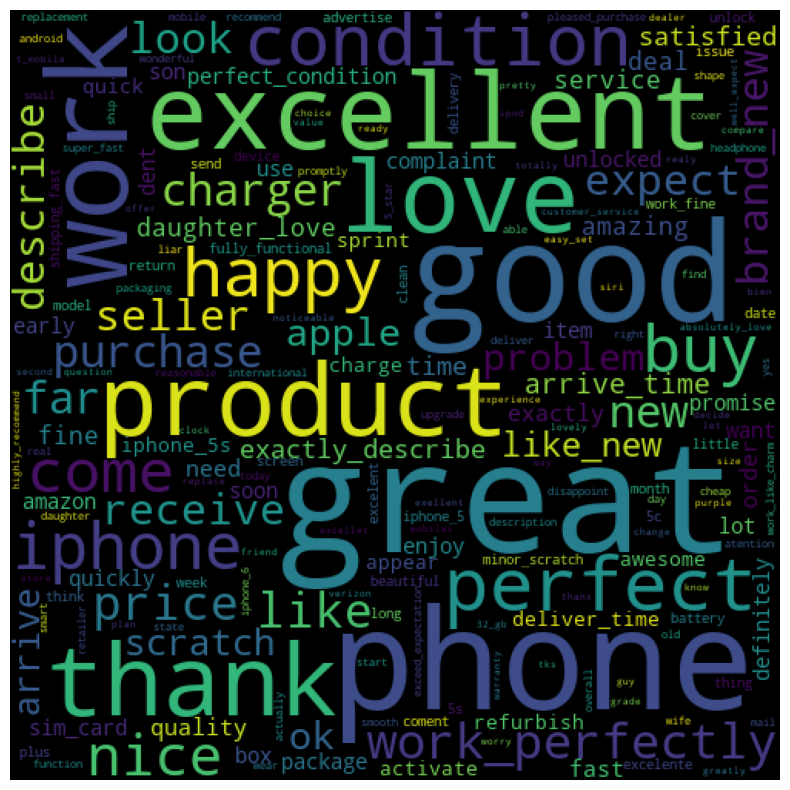

In [123]:
apple_positive_tfidf_wc = wc.generate_from_frequencies(apple_positive_review_tfidf_scores)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(apple_positive_tfidf_wc)
plt.show()